# M31 Satellites and where to find them

## Plot position and kinematics

In [1]:
import pandas as pd
import numpy as np

df_m31_sat = pd.read_csv("m31_subgroup_members.csv")

In [2]:
df_m31_sat.columns

Index(['Object Name', 'RA', 'Dec', 'cz (Velocity)', 'M_V', 'Sigma', 'Rsun',
       'Metallicities', 'Msun 1e6'],
      dtype='object')

In [3]:
latex_table = df_m31_sat.to_latex(index=False, column_format="lrrrrrr", float_format="%.2f", longtable=True)

# Save to a .tex file (optional)
with open("m31_satellite_table.tex", "w") as f:
    f.write(latex_table)

# Print LaTeX code
print(latex_table)

\begin{longtable}{lrrrrrr}
\toprule
Object Name & RA & Dec & cz (Velocity) & M_V & Sigma & Rsun & Metallicities & Msun 1e6 \\
\midrule
\endfirsthead
\toprule
Object Name & RA & Dec & cz (Velocity) & M_V & Sigma & Rsun & Metallicities & Msun 1e6 \\
\midrule
\endhead
\midrule
\multicolumn{9}{r}{Continued on next page} \\
\midrule
\endfoot
\bottomrule
\endlastfoot
Andromeda I & 11.42 & 38.04 & -376.24 & -11.70 & 10.60 & 745 & -1.45 & 3.90 \\
Andromeda II & 19.12 & 33.42 & -193.67 & -10.00 & 7.30 & 652 & -1.64 & 7.60 \\
Andromeda III & 8.89 & 36.50 & -344.16 & -10.00 & 4.70 & 748 & -1.78 & 0.83 \\
Andromeda IX & 13.22 & 43.20 & -209.26 & -8.10 & 4.50 & 766 & -2.2 & 0.15 \\
Andromeda V & 17.57 & 47.63 & -397.23 & -9.10 & 11.50 & 773 & -1.6 & 0.39 \\
Andromeda VI & 357.94 & 24.58 & -340.86 & -11.30 & 9.40 & 783 & -1.3 & 2.80 \\
Andromeda VII & 351.63 & 50.68 & -307.00 & -12.60 & 9.70 & 762 & -1.4 & 9.50 \\
Andromeda X & 16.64 & 44.80 & -163.99 & -7.60 & 3.90 & 701 & -1.93 & 0.10 \\
Andromeda

In [4]:
df_m31_sat.to_csv("m31_subgroup.csv", index=False)

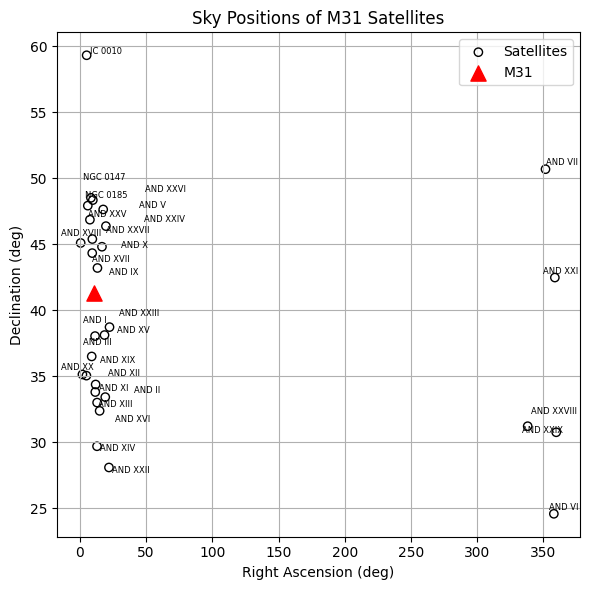

In [5]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Extract values
ra = df_m31_sat["RA"].astype(float).values
dec = df_m31_sat["Dec"].astype(float).values
names = df_m31_sat["Object Name"].values

# Create figure
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(ra, dec, facecolors='none', edgecolors='black', label='Satellites')

# Mark M31's position
ra_m31 = 10.6847083
dec_m31 = 41.26875
ax.scatter(ra_m31, dec_m31, marker='^', color='red', s=120, label='M31')

# Label each satellite with abbreviation if needed
texts = []
for i, name in enumerate(names):
    label = name.replace("Andromeda", "AND") if "Andromeda" in name else name
    texts.append(ax.text(ra[i], dec[i], label, fontsize=6))
adjust_text(texts, ax=ax)

# Formatting
ax.set_xlabel("Right Ascension (deg)")
ax.set_ylabel("Declination (deg)")
ax.set_title("Sky Positions of M31 Satellites")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


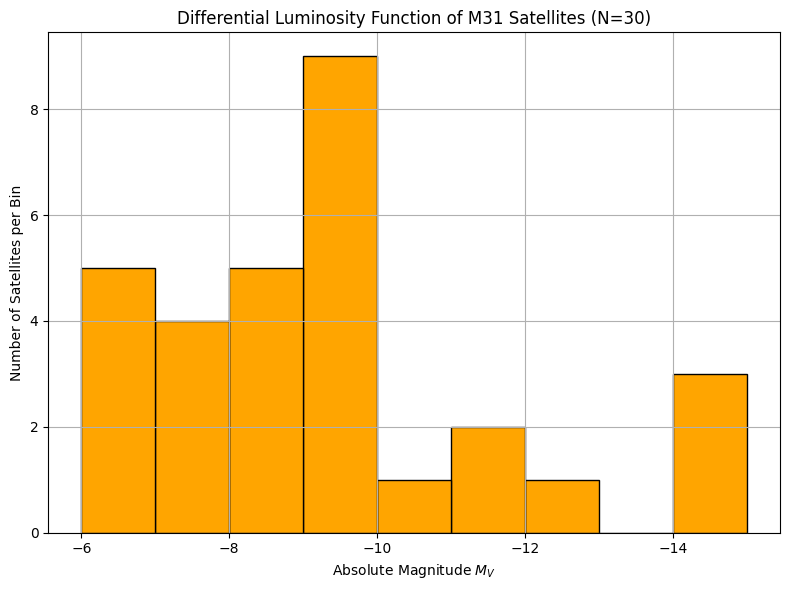

In [6]:
# Fix for correct dataset usage: use df_m31_sat
df_m31_sat["M_V"] = pd.to_numeric(df_m31_sat["M_V"], errors="coerce")
df_m31_sat_clean = df_m31_sat.dropna(subset=["M_V"])

# Double-check count
num_satellites_correct = len(df_m31_sat_clean)

# Define bins and plot
bin_width = 1.0
bins = np.arange(df_m31_sat_clean["M_V"].min(), df_m31_sat_clean["M_V"].max() + bin_width, bin_width)

plt.figure(figsize=(8, 6))
plt.hist(df_m31_sat_clean["M_V"], bins=bins, edgecolor='black', color='orange')
plt.gca().invert_xaxis()
plt.xlabel("Absolute Magnitude $M_V$")
plt.ylabel("Number of Satellites per Bin")
plt.title(f"Differential Luminosity Function of M31 Satellites (N={num_satellites_correct})")
plt.grid(True)
plt.tight_layout()
plt.show()


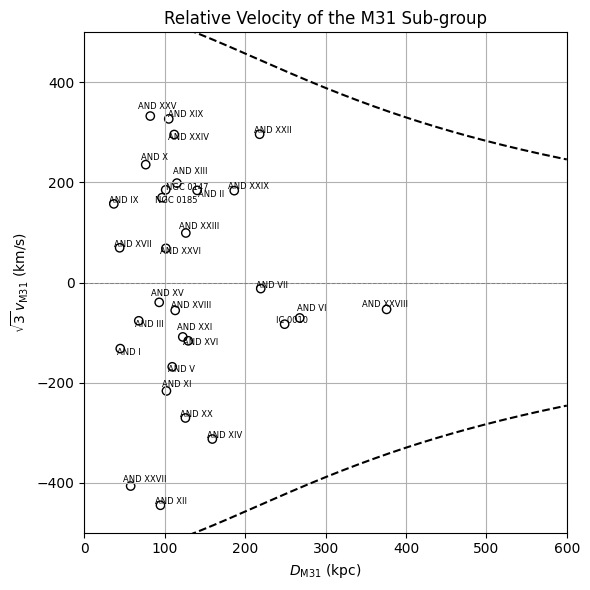

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Constants
vlos_m31 = -300.0  # km/s, approximate heliocentric velocity of M31
d_m31 = 780.0      # distance to M31 in kpc

# Data from your df_m31_sat
ra = df_m31_sat["RA"].astype(float).values
dec = df_m31_sat["Dec"].astype(float).values
dist = df_m31_sat["Distance_kpc"].astype(float).values if "Distance_kpc" in df_m31_sat.columns else np.full(len(ra), d_m31)
vlos = df_m31_sat["cz (Velocity)"].astype(float).values
names = df_m31_sat["Object Name"].values

# Compute projected distance from M31
from astropy.coordinates import SkyCoord
import astropy.units as u

coords = SkyCoord(ra=ra*u.deg, dec=dec*u.deg, distance=dist*u.kpc)
m31 = SkyCoord(ra=10.6847083*u.deg, dec=41.26875*u.deg, distance=d_m31*u.kpc)
d_m31_3d = coords.separation_3d(m31).to(u.kpc).value

# Relative line-of-sight velocity
v_rel = vlos - vlos_m31
v_3d = np.sqrt(3) * v_rel  # isotropic assumption

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(d_m31_3d, v_3d, facecolors='none', edgecolors='black')

# Annotate
texts = []
for i, name in enumerate(names):
    label = name.replace("Andromeda", "AND") if "Andromeda" in name else name
    texts.append(ax.text(d_m31_3d[i], v_3d[i], label, fontsize=6))
adjust_text(texts, ax=ax)

# Escape velocity curve (approximate)
r = np.linspace(10, 600, 300)
v_esc = 550 * (1 / (1 + (r / 300)**2))**0.5  # toy model
ax.plot(r, v_esc, 'k--')
ax.plot(r, -v_esc, 'k--')
ax.axhline(0, linestyle='--', color='gray', linewidth=0.7)

# Formatting
ax.set_xlabel(r"$D_{\mathrm{M31}}$ (kpc)")
ax.set_ylabel(r"$\sqrt{3} \, v_{\mathrm{M31}}$ (km/s)")
ax.set_title("Relative Velocity of the M31 Sub-group")
ax.set_xlim(0, 600)
plt.grid()
ax.set_ylim(-500, 500)
plt.tight_layout()
plt.show()


## Extract Photometry Catalog

After manually added `M_V` column

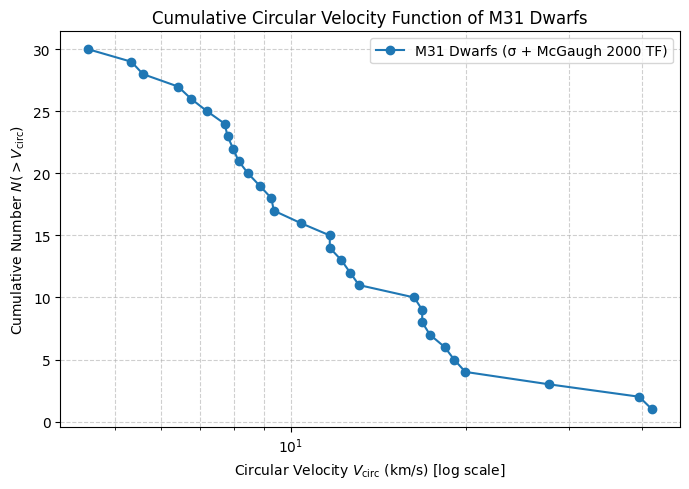

In [10]:
# Use luminosity (L_V in L_sun) instead of M_V for the Tully-Fisher relation
# McGaugh 2000: V_c = (M_star / A)^{1/4}, with A ≈ 35 M_sun / (km/s)^4

# Solar absolute V magnitude
M_sun_V = 4.83
mv_clean = pd.to_numeric(df_m31_sat["M_V"], errors="coerce")
sigma_clean = pd.to_numeric(df_m31_sat["Sigma"], errors="coerce")

vcirc_sigma = np.sqrt(3) * sigma_clean

# Compute luminosity in L_sun from M_V
luminosity = 10 ** (-0.4 * (mv_clean - M_sun_V))

# Assume M_star ≈ L_V (unit mass-to-light ratio in solar units)
M_star = luminosity

# Use McGaugh 2000 BTFR normalization
A = 35  # in solar masses / (km/s)^4
vcirc_tf_lum_corrected = (M_star / A) ** (1 / 4.0)
vcirc_tf_lum_corrected = np.clip(vcirc_tf_lum_corrected, 5, 120)

# Merge with sigma-based V_circ
vcirc_combined_corrected = vcirc_sigma.copy()
vcirc_combined_corrected[sigma_clean.isna()] = vcirc_tf_lum_corrected[sigma_clean.isna()]

# Sort for cumulative plot
vcirc_final_corrected = vcirc_combined_corrected.dropna()
vcirc_sorted_corrected = np.sort(vcirc_final_corrected)
cumulative_N_corrected = np.arange(len(vcirc_sorted_corrected), 0, -1)

# Plot corrected TF curve
plt.figure(figsize=(7, 5))
plt.plot(vcirc_sorted_corrected, cumulative_N_corrected, 'o-', label="M31 Dwarfs (σ + McGaugh 2000 TF)")
plt.xscale("log")
plt.xlabel("Circular Velocity $V_{\\rm circ}$ (km/s) [log scale]")
plt.ylabel("Cumulative Number $N(>V_{\\rm circ})$")
plt.title("Cumulative Circular Velocity Function of M31 Dwarfs")
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
vl2_columns = [
    "id", "GCdistance_kpc", "peakVmax_kms", "Vmax_kms", "rVmax_kpc",
    "Mtidal_Msun", "rtidal_kpc",
    "rel_pos_x", "rel_pos_y", "rel_pos_z",
    "rel_vel_x", "rel_vel_y", "rel_vel_z",
    "M300_Msun", "M600_Msun"
]

vl2_df = pd.read_csv("vltwosubs.txt", names = vl2_columns, delimiter=" ")

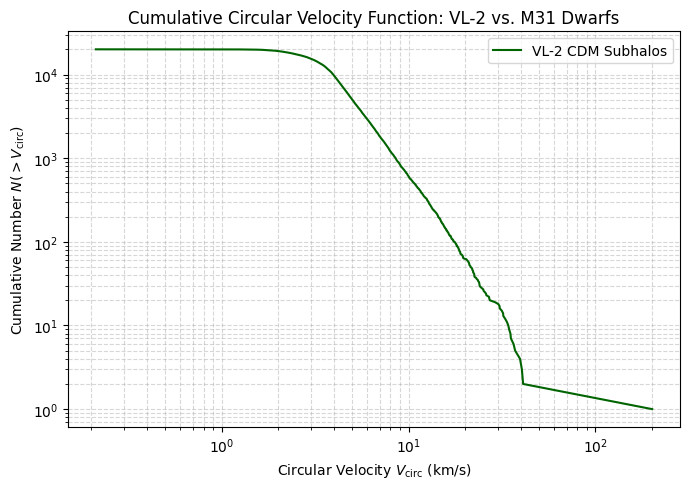

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Extract circular velocities (use z=0 Vmax)
vcirc_vl2 = vl2_df["Vmax_kms"].astype(float)
vcirc_vl2_clean = vcirc_vl2.replace([np.inf, -np.inf], np.nan).dropna()

# Sort and get cumulative counts
vcirc_vl2_sorted = np.sort(vcirc_vl2_clean)
cumulative_vl2 = np.arange(len(vcirc_vl2_sorted), 0, -1)

# Plot
plt.figure(figsize=(7, 5))
plt.plot(vcirc_vl2_sorted, cumulative_vl2, '-', color='darkgreen', label="VL-2 CDM Subhalos")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Circular Velocity $V_{\\rm circ}$ (km/s)")
plt.ylabel("Cumulative Number $N(>V_{\\rm circ})$")
plt.title("Cumulative Circular Velocity Function: VL-2 vs. M31 Dwarfs")
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


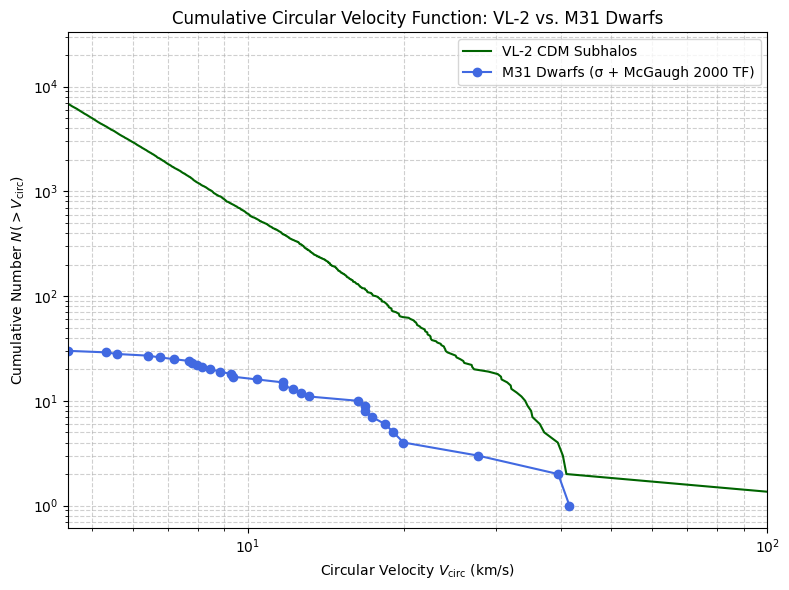

In [17]:
# Get the minimum non-zero circular velocity in the M31 dataset
vmin_obs = vcirc_sorted_corrected[vcirc_sorted_corrected > 0].min()

# Re-plot with adjusted x-axis starting from observed minimum V_circ
plt.figure(figsize=(8, 6))
plt.plot(vcirc_vl2_sorted, cumulative_vl2, '-', color='darkgreen', label="VL-2 CDM Subhalos")
plt.plot(vcirc_sorted_corrected, cumulative_N_corrected, 'o-', color='royalblue', label="M31 Dwarfs (σ + McGaugh 2000 TF)")

plt.xscale("log")
plt.yscale("log")
plt.xlim(vmin_obs, 100)  # Set x-axis lower limit to minimum observed
plt.xlabel("Circular Velocity $V_{\\rm circ}$ (km/s)")
plt.ylabel("Cumulative Number $N(>V_{\\rm circ})$")
plt.title("Cumulative Circular Velocity Function: VL-2 vs. M31 Dwarfs")
plt.grid(True, which='both', ls='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()